In [62]:

import warnings
warnings.simplefilter("ignore")
%pip install xgboost

import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as py 
%matplotlib inline

from scipy.stats import skew

from sklearn.preprocessing import OneHotEncoder ,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split , StratifiedKFold , GridSearchCV
from sklearn.metrics import classification_report , accuracy_score, precision_score, recall_score, f1_scoreF

from xgboost import XGBClassifier

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("/Users/sandaraung/Documents/AIDI ML Framework/german_credit_data.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape

(1000, 10)

In [5]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [8]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## Unique Values

In [21]:
def unique_value(data_set, column_name):
    return data_set[column_name].nunique()

print("Number of the Unique Values:")
print(unique_value(df,list(df.columns)))

Number of the Unique Values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


## Identifying Missing and Replacing

In [23]:
# Identify missing values
missing_values = df.isnull().sum().sort_values(ascending=False)

missing_values_df = pd.DataFrame({
    'Missing Values': missing_values.values,
    'Percentage Missing': (missing_values / len(df)) * 100
})

# Print the DataFrame
print("\n", missing_values_df)


                   Missing Values  Percentage Missing
Checking account             394                39.4
Saving accounts              183                18.3
Age                            0                 0.0
Sex                            0                 0.0
Job                            0                 0.0
Housing                        0                 0.0
Credit amount                  0                 0.0
Duration                       0                 0.0
Purpose                        0                 0.0
Risk                           0                 0.0


In [25]:
df['Risk'].replace({'good': 1, 'bad': 0}, inplace=True)

In [26]:
#Filling missing values with mode
df["Saving accounts"].fillna(df['Saving accounts'].mode()[0], inplace=True)
df["Checking account"].fillna(df['Checking account'].mode()[0], inplace=True)

In [27]:
# Identify missing values
missing_values = df.isnull().sum().sort_values(ascending=False)

missing_values_df = pd.DataFrame({
    'Missing Values': missing_values.values,
    'Percentage Missing': (missing_values / len(df)) * 100
})

# Print the DataFrame
print("\n", missing_values_df)


                   Missing Values  Percentage Missing
Age                            0                 0.0
Sex                            0                 0.0
Job                            0                 0.0
Housing                        0                 0.0
Saving accounts                0                 0.0
Checking account               0                 0.0
Credit amount                  0                 0.0
Duration                       0                 0.0
Purpose                        0                 0.0
Risk                           0                 0.0


### We can see that no null value and all the data are numeric data.

In [29]:
# Separate columns into numerical and categorical
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display the results
print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", categorical_columns)

Numerical Columns:
 Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk'], dtype='object')

Categorical Columns:
 Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')


In [30]:
numerical_columns = ['Age', 'Job', 'Credit amount', 'Duration']

In [31]:
# Display count of unique values in each feature

categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


for column in categorical_columns:
    unique_values_count = df[column].value_counts()
    print(f"Feature: {column}\n{unique_values_count}\n{'-'*30}")

Feature: Sex
male      690
female    310
Name: Sex, dtype: int64
------------------------------
Feature: Housing
own     713
rent    179
free    108
Name: Housing, dtype: int64
------------------------------
Feature: Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
------------------------------
Feature: Checking account
little      668
moderate    269
rich         63
Name: Checking account, dtype: int64
------------------------------
Feature: Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64
------------------------------


In [34]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


# One hot encoding for categorical variables

In [36]:
# Select the categorical columns
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Use the fit_transform method to perform one-hot encoding
df_encoded_array = encoder.fit_transform(df[categorical_columns].astype(str)).toarray()

# Create a DataFrame with the encoded features
df_encoded = pd.DataFrame(df_encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the new DataFrame with the original one, dropping the original categorical columns
data_encoded = pd.concat([df, df_encoded], axis=1).drop(categorical_columns, axis=1)

# Display the resulting DataFrame
data_encoded.head()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,2,5951,48,0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,1,2096,12,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,2,7882,42,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,2,4870,24,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualizing the histograms for numerical features

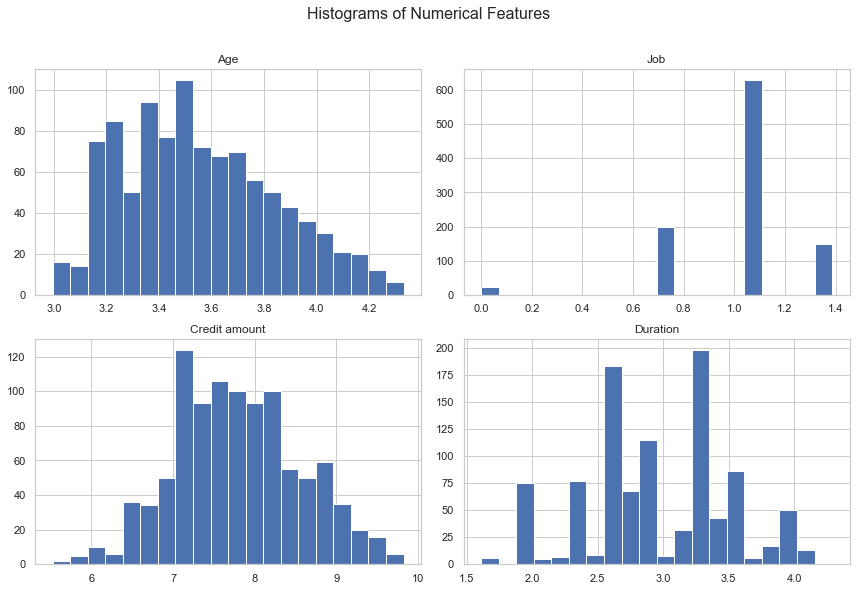

In [63]:
# Plot histograms for numerical features
df[numerical_columns].hist(bins=20, figsize=(12,8))
py.suptitle("Histograms of Numerical Features", y=1.02, size=16)
py.tight_layout()
py.show()

## Obsrevation skewness in the data

In [41]:
skewness = df[numerical_columns].apply(lambda x: skew(x))

# Display skewness values
print("Skewness of Numerical Features:\n", skewness)

# Identify features with skewness greater than a threshold (e.g., 0.5)
skewed_features = skewness[abs(skewness) > 0.25].index

Skewness of Numerical Features:
 Age              1.019208
Job             -0.373733
Credit amount    1.946702
Duration         1.092542
dtype: float64


#### Observation

**Age**: Skewness of 1.019208 indicates a moderately right-skewed distribution.

**Job**: Skewness of -0.373733 indicates a slightly left-skewed distribution, but it is close to being symmetric.

**Credit amount**: Skewness of 1.946702 indicates a highly right-skewed distribution.

**Duration**: Skewness of 1.092542 indicates a moderately right-skewed distribution.

## Applying Log Transformation to Skewed Features

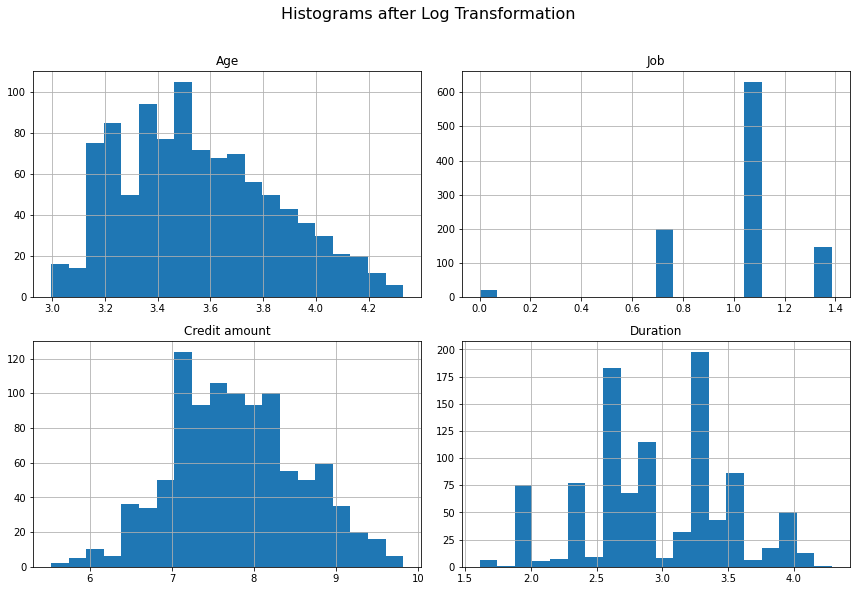

In [42]:
# Apply log transformation to skewed features
df[skewed_features] = np.log1p(df[skewed_features])

# Display histograms after log transformation
df[skewed_features].hist(bins=20, figsize=(12,8))
py.suptitle("Histograms after Log Transformation", y=1.02, size=16)
py.tight_layout()
py.show()

### Observation 

The histograms indicate that the log transformation has successfully reduced skewness and brought the distributions closer to normal for Age, Credit amount, and Duration. The Job feature remains unaffected due to its categorical nature, which is expected.

## Applying Feature Scaling , Using MinMax Scaling on Numerical Columns

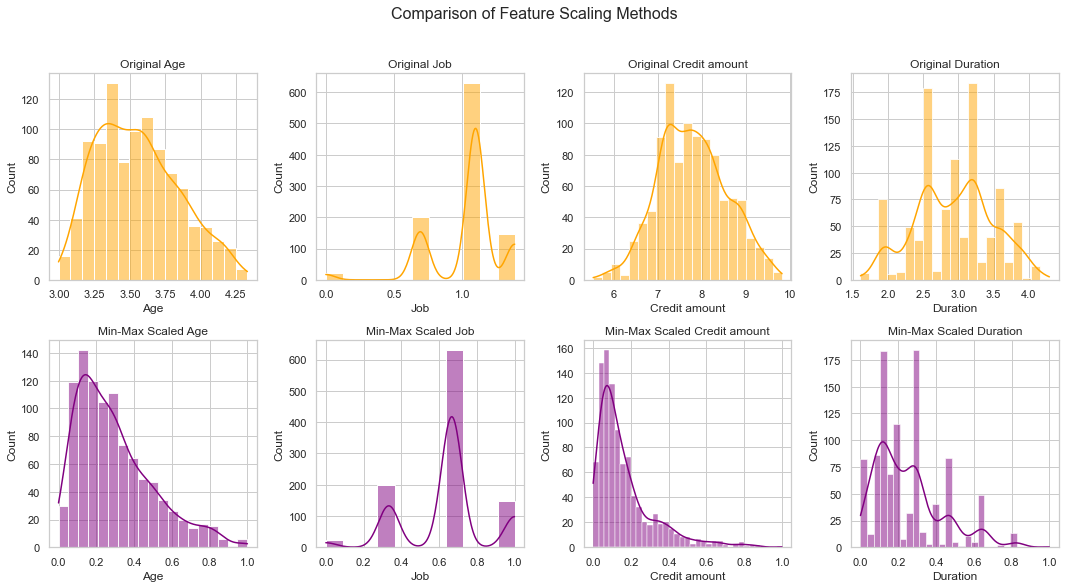

In [68]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_encoded_scaled = data_encoded.copy()
data_encoded_scaled[numerical_columns] = min_max_scaler.fit_transform(data_encoded_scaled[numerical_columns])

# Set the style for Seaborn
snb.set(style="whitegrid")

# Create subplots using Seaborn
fig, axes = py.subplots(nrows=2, ncols=len(numerical_columns), figsize=(15, 8))
fig.suptitle("Comparison of Feature Scaling Methods", y=1.02, size=16)

# Plot original distributions with KDE plots
for i, col in enumerate(numerical_columns):
    snb.histplot(df[col], kde=True, color='orange', ax=axes[0, i])
    axes[0, i].set_title(f"Original {col}")

# Plot distributions after Min-Max Scaling with KDE plots
for i, col in enumerate(numerical_columns):
    snb.histplot(data_encoded_scaled[col], kde=True, color='purple', ax=axes[1, i])
    axes[1, i].set_title(f"Min-Max Scaled {col}")

# Adjust layout
py.tight_layout()
py.show()

In [45]:
data_encoded_scaled.head()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,0.666667,0.050567,0.029412,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.666667,0.313690,0.647059,0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,0.333333,0.101574,0.117647,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,0.666667,0.419941,0.558824,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,0.666667,0.254209,0.294118,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Numerical features for clustering

In [46]:
# Choose the number of cluster
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data_encoded_scaled)

# Add the cluster labels to the original dataset
data_encoded_scaled['Cluster'] = clusters

data_encoded_scaled.head(5)

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,0.857143,0.666667,0.050567,0.029412,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,0.053571,0.666667,0.313690,0.647059,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.535714,0.333333,0.101574,0.117647,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.464286,0.666667,0.419941,0.558824,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.607143,0.666667,0.254209,0.294118,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# elbow method to find best number of clusters

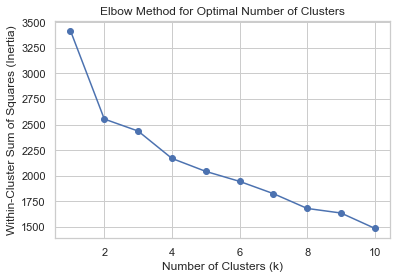

In [47]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph with markers at potential elbow points
py.plot(range(1, 11), inertia_values, marker='o')
py.title('Elbow Method for Optimal Number of Clusters')
py.xlabel('Number of Clusters (k)')
py.ylabel('Within-Cluster Sum of Squares (Inertia)')
py.show()

#### Analyzing the Plot
Initial Rapid Decline: The plot shows a sharp decline in WCSS (within-cluster sum of squares ) from k=1 to k=2, and then a noticeable decline from k=2 to k=3.
Gradual Slope: After k=3, the slope of the decline becomes more gradual.

#### Optimal Number of Clusters
The "elbow point" appears to be around k=3. This is where the rate of decrease in WCSS slows down significantly. Adding more clusters beyond k=3 does not result in a substantial reduction in WCSS, indicating that three clusters might be sufficient to capture the underlying structure of the data.

Therefore, the best number of clusters appears to be 3.

# Visualize using PCA

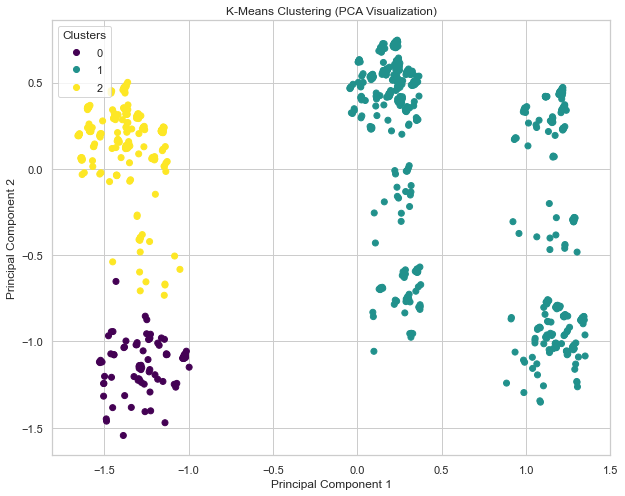

In [48]:
# Choose the optimum number of clusters (elbow point)
optimal_k = 3  

# Perform k-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_encoded_scaled)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_encoded_scaled)

# Visualize the clusters in 2D using PCA
py.figure(figsize=(10, 8))
scatter = py.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
py.title('K-Means Clustering (PCA Visualization)')
py.xlabel('Principal Component 1')
py.ylabel('Principal Component 2')
py.legend(*scatter.legend_elements(), title='Clusters')
py.show()

In [49]:
# Setting features (X) and target (y)
X = data_encoded.drop(columns=['Risk'])
y = data_encoded['Risk']

In [50]:
X.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,2,5951,48,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,1,2096,12,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,2,7882,42,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,2,4870,24,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int64

# Splitting the data for training and testing

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Implementing KFold CV Using XGBoost classifier

In [54]:
param_grid = {
    'max_depth': [5, 10, 25, 35, 50, 75, 125],
    'learning_rate': [0.05, 0.1, 0.2], 
    'n_estimators': [100, 150, 200, 250],
}

xgb_clf = XGBClassifier(objective='binary:logistic', alpha =10, random_state = 42, n_jobs = -1)

# Implementing 5-fold KFold cross validation strategy
cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# GridSearchCV object to find the best parameters
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=cv)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Accuracy: 0.7


In [55]:
#fit the classifier to the training data
xgb_clf.fit(X_train , y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [56]:
# make predictions on test data
x_pred = xgb_clf.predict(X_test)

In [57]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, x_pred)))

XGBoost model accuracy score: 0.7120


# Evaluation Matrics and Classifiaction Report

In [59]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-Score:", f1)

Test Accuracy: 0.7
Test Precision: 0.7032520325203252
Test Recall: 0.9885714285714285
Test F1-Score: 0.8218527315914489


In [60]:
grid_predictions = grid_search.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        75
           1       0.70      0.99      0.82       175

    accuracy                           0.70       250
   macro avg       0.60      0.51      0.44       250
weighted avg       0.64      0.70      0.59       250



The classification report for the XGBoost model reveals a mixed performance, with an overall accuracy of 70%. The model performs well for the majority class (class 1), achieving a precision of 0.70, a recall of 0.99, and an F1-score of 0.82. However, the performance for the minority class (class 0) is notably poor, with a precision of 0.50, a recall of only 0.03, and an F1-score of 0.05. The macro average metrics (precision: 0.60, recall: 0.51, F1-score: 0.44) highlight the imbalance in the model’s performance across the two classes, indicating a need for strategies to improve the identification of the minority class.